# Optimal cut-point for each candidate biomarkers

Before running this file, make sure you organize the workspace correctly.

In [25]:
import numpy as np
import pandas as pd
import winsound
from numpy import trapz
import math


### Load Settings

| param | value | 
| ------ | ------ | 
|   filetype     |   '', '_stage_I', '_stage_II', '_stage_III'  |
|  comorbidity_option | 'single' , 'group'|

### Exclude Outliers

In [2]:
# Computing IQR
def IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence=Q3+IQR*1.5
    lower_fence=Q1-IQR*1.5
    return upper_fence,lower_fence
def no_outlier(df):
    upper_fence,lower_fence=IQR(df)
    ddf=df[(df>lower_fence)&(df<upper_fence)]
    return ddf

In [26]:
# for now, filetype should be '' 
filetype = ''
comorbidity_option = 'group'

source_file = f'../champ_result/all_beta_normalized{filetype}.csv'
dest_file = f'../result/all_beta_normalized_result{filetype}_{comorbidity_option}.csv'

In [27]:
df=pd.read_csv(source_file)
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

### Add ID and gene for each marker

In [28]:
DMP_result = pd.read_csv(f'../champ_result/DMP_result{filetype}.csv')
DMP_result.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df_gene = pd.merge(DMP_result[['ID','gene']], df,on='ID')
print(df_gene.shape)
df_gene.head()

(268112, 892)


,ID,gene,1,2,3,4,5,6,7,8,...,881,882,883,884,885,886,887,888,889,890
0,cg05434287,MAD1L1,0.561758,0.561758,0.346045,0.346045,0.552796,0.552796,0.465134,0.465134,...,0.927322,0.927322,0.923495,0.923495,0.912715,0.912715,0.914323,0.914323,0.927284,0.927284
1,cg14789818,NaN,0.218671,0.218671,0.301818,0.301818,0.297999,0.297999,0.436854,0.436854,...,0.824770,0.824770,0.865699,0.865699,0.807923,0.807923,0.862855,0.862855,0.780797,0.780797
2,cg20699586,NaN,0.238567,0.238567,0.309440,0.309440,0.357696,0.357696,0.476326,0.476326,...,0.882322,0.882322,0.883286,0.883286,0.851279,0.851279,0.892564,0.892564,0.817393,0.817393
3,cg24974704,ZC3H3,0.615476,0.615476,0.434498,0.434498,0.580211,0.580211,0.581947,0.581947,...,0.977930,0.977930,0.954368,0.954368,0.961048,0.961048,0.942530,0.942530,0.948677,0.948677
4,cg27616751,FIS1,0.708317,0.708317,0.515525,0.515525,0.603947,0.603947,0.595153,0.595153,...,0.904572,0.904572,0.900352,0.900352,0.877911,0.877911,0.869540,0.869540,0.887501,0.887501


In [29]:
df_gene[df_gene['gene']=='HER2']

,ID,gene,1,2,3,4,5,6,7,8,...,881,882,883,884,885,886,887,888,889,890


### Intersect with the comorbidity list

In [6]:
single = pd.read_csv('../comorbidity/matchgene174_single_3Y10__OR2.txt', sep='\t', header=None)
group = pd.read_csv('../comorbidity/matchgene174_group_3Y10__OR2.txt', sep='\t', header=None)
df_single = df_gene[df_gene['gene'].isin(single[0])]
df_group = df_gene[df_gene['gene'].isin(group[0])]

In [7]:
print(df_single.shape)
df_single.head()

(103286, 892)


,ID,gene,1,2,3,4,5,6,7,8,...,881,882,883,884,885,886,887,888,889,890
0,cg05434287,MAD1L1,0.561758,0.561758,0.346045,0.346045,0.552796,0.552796,0.465134,0.465134,...,0.927322,0.927322,0.923495,0.923495,0.912715,0.912715,0.914323,0.914323,0.927284,0.927284
4,cg27616751,FIS1,0.708317,0.708317,0.515525,0.515525,0.603947,0.603947,0.595153,0.595153,...,0.904572,0.904572,0.900352,0.900352,0.877911,0.877911,0.869540,0.869540,0.887501,0.887501
5,cg19601293,MAD1L1,0.893260,0.893260,0.776623,0.776623,0.933644,0.933644,0.856838,0.856838,...,0.966624,0.966624,0.969536,0.969536,0.967907,0.967907,0.960670,0.960670,0.965243,0.965243
8,cg08951958,ABL1,0.787149,0.787149,0.711573,0.711573,0.740937,0.740937,0.684933,0.684933,...,0.951617,0.951617,0.936790,0.936790,0.945856,0.945856,0.960758,0.960758,0.939658,0.939658
9,cg17901038,UBE2O,0.663985,0.663985,0.656860,0.656860,0.731772,0.731772,0.695819,0.695819,...,0.946143,0.946143,0.926718,0.926718,0.919717,0.919717,0.924134,0.924134,0.913685,0.913685


In [8]:
# no group by stages 
if filetype == '':
    if comorbidity_option == 'single':
        normal = df_single.iloc[:,2:96:2]
        tumor = df_single.iloc[:,96::2]
    elif comorbidity_option == 'group':
        normal = df_group.iloc[:,2:96:2]
        tumor = df_group.iloc[:,96::2]
# elif filetype == '_stage_I':
#     tumor=df.iloc[0:,2:24:2]
#     normal=df.iloc[0:,24::2]
# elif filetype == '_stage_II':
#     tumor=df.iloc[0:,2:104:2]
#     normal=df.iloc[0:,104::2]
# elif filetype == '_stage_III':
#     tumor=df.iloc[0:,2:46:2]
#     normal=df.iloc[0:,46::2]

tumor.columns=range(0,tumor.shape[1])
normal.columns=range(0,normal.shape[1])

# tumor.reset_index(drop=True, inplace=True)
# normal.reset_index(drop=True, inplace=True)
tumor = tumor.T
normal = normal.T 

### Check samples 
check any wrong with samples or settings

In [9]:
print("filetype: ", filetype)
print("comorbidity_option: ", comorbidity_option)
print('tumor sample count: ', tumor.shape[0])
print('normal sample count: ', normal.shape[0])
print('marker count: ', tumor.shape[1], normal.shape[1])

filetype:  
comorbidity_option:  group
tumor sample count:  398
normal sample count:  47
marker count:  104496 104496


In [10]:
normal_avg = normal.mean(skipna=True, axis=0)

In [11]:
t_dbeta=(tumor).subtract(normal_avg, axis = 1) 
n_dbeta=(normal).subtract(normal_avg, axis = 1)

In [ ]:
t_dbeta

In [12]:
all_sen = pd.DataFrame()
all_spe = pd.DataFrame()
for i in np.arange(0.01,1,0.01):
    cp = i.__round__(2)
    TP = (t_dbeta.abs() > cp).sum()
    FN = (t_dbeta.abs() < cp).sum()
    FP = (n_dbeta.abs() > cp).sum()
    TN = (n_dbeta.abs() < cp).sum()
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)

    all_sen = pd.concat([all_sen, sensitivity], ignore_index=True, axis=1)
    all_spe = pd.concat([all_spe, specificity], ignore_index=True, axis=1)        
# winsound.Beep(800, 800)


In [ ]:
all_sen

In [13]:
# Youden Index (J)
Approach_J = all_sen + all_spe - 1 
max_columns_J = Approach_J.idxmax(axis=1)
max_values_J = Approach_J.max(axis=1)

sen_J = all_sen.melt().loc[max_columns_J.index].iloc[:,1]
spe_J = all_spe.melt().loc[max_columns_J.index].iloc[:,1]

In [14]:
# Concordance Probability Method (CZ)
Approach_CZ = all_sen * all_spe
max_columns_CZ = Approach_CZ.idxmax(axis=1)
max_values_CZ = Approach_CZ.max(axis=1)

sen_CZ = all_sen.melt().loc[max_columns_CZ.index].iloc[:,1]
spe_CZ = all_spe.melt().loc[max_columns_CZ.index].iloc[:,1]

In [15]:
# Closest to (0,1) Criteria (ER)
Approach_ER = ((1-all_sen)**2 + (1-all_spe)**2)
Approach_ER = Approach_ER.apply(np.sqrt)
min_columns_ER = Approach_ER.idxmin(axis=1)
min_values_ER = Approach_ER.min(axis=1)

sen_ER = all_sen.melt().loc[min_columns_ER.index].iloc[:,1]
spe_ER = all_spe.melt().loc[min_columns_ER.index].iloc[:,1]

In [16]:
# Index of Union (IU)
AUC = trapz(y = all_sen[:], x = all_spe[:] - 1 ,axis=1)
Approach_UI = abs(all_sen.subtract(AUC, axis=0)) + abs(all_spe.subtract(AUC, axis=0))
min_columns_UI = Approach_UI.idxmin(axis=1)
min_values_UI = Approach_UI.min(axis=1)

sen_UI = all_sen.melt().loc[min_columns_UI.index].iloc[:,1] 
spe_UI = all_spe.melt().loc[min_values_UI.index].iloc[:,1]

In [17]:
# F1 score
Approach_F1 = 2 * all_sen * all_spe / (all_sen + all_spe)
max_columns_F1 = Approach_F1.idxmax(axis=1)
max_values_F1 = Approach_F1.max(axis=1)

sen_F1 = all_sen.melt().loc[max_columns_F1.index].iloc[:,1]
spe_F1 = all_spe.melt().loc[max_columns_F1.index].iloc[:,1]

In [18]:
result_df = pd.DataFrame({
        'J': max_values_J, 
        'J cut-point': (max_columns_J+1)/100, 
        'J sensitivity': sen_J, 
        'J specificity': spe_J, 
        'CZ': max_values_CZ,
        'CZ cut-point': (max_columns_CZ+1)/100,
        'CZ sensitivity': sen_CZ,
        'CZ specificity': spe_CZ,
        'ER': min_values_ER,
        'ER cut-point': (min_columns_ER+1)/100,
        'ER sensitivity': sen_ER,
        'ER specificity': spe_ER,
        'UI': min_values_UI,
        'UI cut-point': (min_columns_UI+1)/100,
        'UI sensitivity': sen_UI,
        'UI specificity': spe_UI,
        'F1': max_values_F1,
        'F1 cut-point': (max_columns_F1+1)/100,
        'F1 sensitivity': sen_F1,
        'F1 specificity': spe_F1,
        'AUC': AUC
    })
result_df

,J,J cut-point,J sensitivity,J specificity,CZ,CZ cut-point,CZ sensitivity,CZ specificity,ER,ER cut-point,...,ER specificity,UI,UI cut-point,UI sensitivity,UI specificity,F1,F1 cut-point,F1 sensitivity,F1 specificity,AUC
0,0.972362,0.20,1.000000,0.042553,0.972362,0.20,1.000000,0.042553,0.027638,0.20,...,0.042553,0.051695,0.19,1.000000,0.042553,0.985987,0.20,1.000000,0.042553,0.952208
4,0.844542,0.15,1.000000,0.234043,0.850529,0.15,1.000000,0.234043,0.110420,0.15,...,0.234043,0.017909,0.16,1.000000,0.234043,0.922212,0.15,1.000000,0.234043,0.905324
5,0.795627,0.08,0.997487,0.127660,0.806052,0.08,0.997487,0.127660,0.144635,0.08,...,0.127660,0.159788,0.09,0.997487,0.127660,0.897794,0.08,0.997487,0.127660,0.800679
8,0.822089,0.10,0.997487,0.085106,0.828504,0.10,0.997487,0.085106,0.129789,0.12,...,0.085106,0.166257,0.13,0.997487,0.085106,0.909400,0.10,0.997487,0.085106,0.807735
9,0.880894,0.09,0.997487,0.021277,0.884422,0.09,0.997487,0.021277,0.084438,0.09,...,0.021277,0.270341,0.15,0.997487,0.021277,0.940427,0.09,0.997487,0.021277,0.746739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268090,0.076713,0.02,0.394472,1.000000,0.210414,0.01,0.394472,1.000000,0.761101,0.01,...,1.000000,0.865498,0.01,0.394472,1.000000,0.425123,0.01,0.394472,1.000000,0.062199
268092,0.060302,0.04,0.434673,0.787234,0.269967,0.01,0.434673,0.787234,0.679428,0.01,...,0.787234,0.780124,0.01,0.434673,0.787234,0.519440,0.01,0.434673,0.787234,0.129664
268094,0.187854,0.01,0.615578,0.765957,0.341815,0.01,0.615578,0.765957,0.593008,0.01,...,0.765957,0.721426,0.03,0.615578,0.765957,0.575518,0.01,0.615578,0.765957,0.198653
268096,0.147867,0.01,0.384422,0.851064,0.292526,0.01,0.384422,0.851064,0.660917,0.01,...,0.851064,0.947236,0.04,0.384422,0.851064,0.509687,0.01,0.384422,0.851064,0.053993


### Caculate mean for each biomarker in tumor samples

In [19]:
t_dbeta_avg = t_dbeta.mean(skipna=True, axis=0)
print(t_dbeta_avg.shape)
t_dbeta_avg.head(10)

(104496,)


0     0.339272
4     0.225588
5     0.097298
8     0.176497
9     0.175790
13    0.483104
16    0.090638
21    0.335394
27   -0.127539
29    0.294809
dtype: float64

In [20]:
print('comorbidity_option: ', comorbidity_option)
if comorbidity_option == 'single':
    df_join = df_single
elif comorbidity_option == 'group':
    df_join = df_group
t_dbeta_avg_df = pd.DataFrame(t_dbeta_avg)
result_avg_df = pd.concat([result_df, t_dbeta_avg_df], axis=1)

result_avg_df.rename(columns={0:'t_dbeta_avg'}, inplace=True)
result_avg_df = pd.concat([df_join.iloc[:,:2],result_avg_df], axis=1)
result_avg_df

comorbidity_option:  group


,ID,gene,J,J cut-point,J sensitivity,J specificity,CZ,CZ cut-point,CZ sensitivity,CZ specificity,...,UI,UI cut-point,UI sensitivity,UI specificity,F1,F1 cut-point,F1 sensitivity,F1 specificity,AUC,t_dbeta_avg
0,cg05434287,MAD1L1,0.972362,0.20,1.000000,0.042553,0.972362,0.20,1.000000,0.042553,...,0.051695,0.19,1.000000,0.042553,0.985987,0.20,1.000000,0.042553,0.952208,0.339272
4,cg27616751,FIS1,0.844542,0.15,1.000000,0.234043,0.850529,0.15,1.000000,0.234043,...,0.017909,0.16,1.000000,0.234043,0.922212,0.15,1.000000,0.234043,0.905324,0.225588
5,cg19601293,MAD1L1,0.795627,0.08,0.997487,0.127660,0.806052,0.08,0.997487,0.127660,...,0.159788,0.09,0.997487,0.127660,0.897794,0.08,0.997487,0.127660,0.800679,0.097298
8,cg08951958,ABL1,0.822089,0.10,0.997487,0.085106,0.828504,0.10,0.997487,0.085106,...,0.166257,0.13,0.997487,0.085106,0.909400,0.10,0.997487,0.085106,0.807735,0.176497
9,cg17901038,UBE2O,0.880894,0.09,0.997487,0.021277,0.884422,0.09,0.997487,0.021277,...,0.270341,0.15,0.997487,0.021277,0.940427,0.09,0.997487,0.021277,0.746739,0.175790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268090,cg24194410,SLC12A2,0.076713,0.02,0.394472,1.000000,0.210414,0.01,0.394472,1.000000,...,0.865498,0.01,0.394472,1.000000,0.425123,0.01,0.394472,1.000000,0.062199,0.003024
268092,cg02473288,MYO1E,0.060302,0.04,0.434673,0.787234,0.269967,0.01,0.434673,0.787234,...,0.780124,0.01,0.434673,0.787234,0.519440,0.01,0.434673,0.787234,0.129664,0.007936
268094,cg06370812,MUC4,0.187854,0.01,0.615578,0.765957,0.341815,0.01,0.615578,0.765957,...,0.721426,0.03,0.615578,0.765957,0.575518,0.01,0.615578,0.765957,0.198653,-0.006807
268096,cg08623062,CA8,0.147867,0.01,0.384422,0.851064,0.292526,0.01,0.384422,0.851064,...,0.947236,0.04,0.384422,0.851064,0.509687,0.01,0.384422,0.851064,0.053993,0.010275


In [71]:
print("filetype:  ", filetype)
print("comorbidity_option: ", comorbidity_option)

filetype:   
comorbidity_option:  group


In [72]:
# dest_file = f'../result/all_beta_normalized_result{filetype}.csv'
dest_file = f'../result/all_beta_normalized_result{filetype}_{comorbidity_option}.csv'
print('write to file: ', dest_file)
result_avg_df.to_csv(dest_file, index=False)

write to file:  ../result/all_beta_normalized_result_group.csv


### below is unused

In [ ]:
# draw ROC curve of the first 5 markers in subplots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# fig = plt.figure(figsize=(20, 10))
# gs = gridspec.GridSpec(2, 3)
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.plot(1-all_spe.iloc[2], all_sen.iloc[2])
# ax1.set_title('ROC curve of the first marker')
# ax1.set_xlabel('1-specificity')
# ax1.set_ylabel('sensitivity')
# 6 by 6 subplots
fig, axs = plt.subplots(6, 6, figsize=(30, 30))

for i in range(6):
    for j in range(6):
        axs[i, j].scatter(1-all_spe.iloc[i*6+j], all_sen.iloc[i*6+j])
        axs[i, j].set_title(f'ROC curve of the {i*6+j+1}th marker')
        axs[i, j].set_xlabel('1-specificity')
        axs[i, j].set_ylabel('sensitivity')
        # axs[i, j].set_xlim([0, 1])
        # axs[i, j].set_ylim([0, 1])
        axs[i, j].set_aspect('equal', adjustable='box')
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].grid(True)
    
fig.tight_layout()

In [22]:
print("number of markers with delta beta avg > 0 (hyper) : ",end="")
print(t_dbeta_avg[t_dbeta_avg > 0].shape[0])
t_dbeta_avg[t_dbeta_avg > 0].head()

number of markers with delta beta avg > 0 (hyper) : 63065


0    0.339272
4    0.225588
5    0.097298
8    0.176497
9    0.175790
dtype: float64

In [23]:
print("number of markers with delta beta avg < 0 (hypo) : ",end="")
print(t_dbeta_avg[t_dbeta_avg < 0].shape[0])
t_dbeta_avg[t_dbeta_avg < 0].head()

number of markers with delta beta avg < 0 (hypo) : 41431


27    -0.127539
43    -0.355029
51    -0.204842
62    -0.258313
103   -0.367955
dtype: float64

In [ ]:
print(result_avg_df.groupby('methylation difference').size())
print(result_avg_df.groupby('methylation level').size())
print(result_avg_df.groupby('gene').size())

In [86]:
import pandas as pd
single_result = pd.read_csv('../result/test_result.csv')

hyper_all = single_result.groupby('methylation level').size()['hyper']
hypo_all = single_result.groupby('methylation level').size()['hypo']

# count the number of markers with methylation level hyper and methylation difference high
hyper_high = single_result[(single_result['methylation level'] == 'hyper') & (single_result['methylation difference'] == 'high')].shape[0]


# count the number of markers with methylation level hypo and methylation difference high
hypo_high = single_result[(single_result['methylation level'] == 'hypo') & (single_result['methylation difference'] == 'high')].shape[0]

In [87]:
single_result

,ID,gene,sen_plus_spe,cut-point,sensitivity,specificity,F1,t_dbeta_avg,methylation difference,methylation level,dBeta,test_methylation_level,test_methylation_difference
0,cg00001583,NR5A2,1.723618,0.17,0.723618,1.000000,0.839650,0.310063,high,hyper,0.324637,hyper,high
1,cg00002028,PINK1,1.378702,0.01,0.527638,0.851064,0.651415,0.013361,high,hyper,0.000113,hyper,low
2,cg00023492,NBL1,1.338661,0.01,0.530151,0.808511,0.640390,0.019238,high,hyper,0.009051,hyper,low
3,cg00030466,PRDM16,1.002513,0.03,0.002513,1.000000,0.005013,-0.300170,high,hypo,-0.347929,hypo,high
4,cg00031456,PRPF38B,1.162461,0.01,0.268844,0.893617,0.413336,0.003827,low,hyper,0.003109,hyper,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100971,cg27532722,MMP11,1.365658,0.14,0.386935,0.978723,0.554607,0.040238,low,hyper,0.080725,hyper,low
100972,cg27575890,EIF3D,1.669999,0.07,0.776382,0.893617,0.830884,0.170828,high,hyper,0.247295,hyper,high
100973,cg27601574,SMTN,1.291083,0.05,0.525126,0.765957,0.623080,0.031469,low,hyper,0.008688,hyper,low
100974,cg27611781,PDXP,1.168342,0.06,0.168342,1.000000,0.288172,0.032106,low,hyper,0.030844,hyper,low


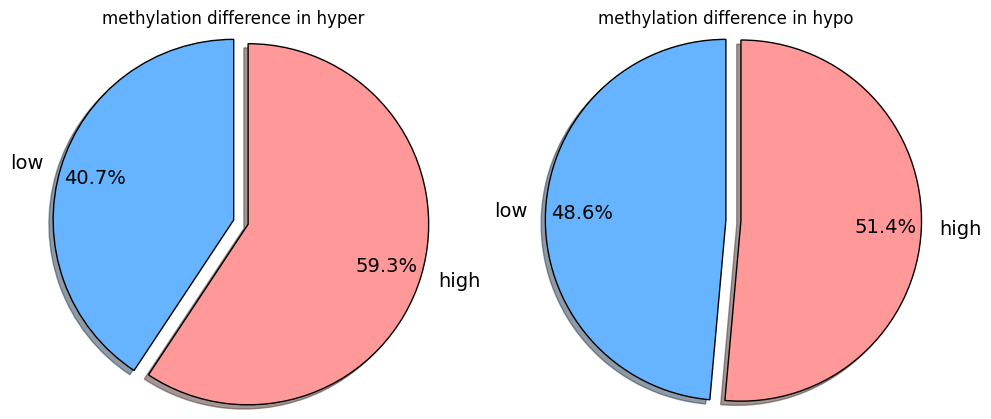

In [88]:
# draw two pie charts to show the ratio of hyper and hypo markers with methylation difference high
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# add title
plt.title('methylation difference in hyper')
plt.pie([hyper_high, hyper_all-hyper_high], 
        labels=['high', 'low'], 
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'],
        startangle=90,
        textprops={'fontsize': 14},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        explode=(0.1,0),
        shadow=True,
        radius=1.2,
        pctdistance=0.8,
        labeldistance=1.1,
        counterclock=False)
        
plt.subplot(1,2,2)
# add title
plt.title('methylation difference in hypo')
plt.pie([hypo_high, hypo_all-hypo_high],
        labels=['high', 'low'],
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'],
        startangle=90,
        textprops={'fontsize': 14},
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        explode=(0.1,0),
        shadow=True,
        radius=1.2,
        pctdistance=0.8,
        labeldistance=1.1,
        counterclock=False)
plt.tight_layout()
plt.show()

